In [ ]:
"""
케라스
: Sequential 클래스로 모델 생성(순차적으로 레이어를 쌓아가는 방식으로 모델링)
1) 데이터셋 생성
- 훈련/검증/시험셋 생성
- 데이터 형식 변환
2) 모델(신경망/깊은 신경망) 구성
- Sequential 클래스 이용하여 레이어 추가하여 구성
- 복잡한 모델의 경우에는 함수api 사용
3) 학습과정 설정
- cost함수 정의, 최적화 방법 정의
- compile함수
4) 모델 학습
- 훈련 -> 모델 학습
- fit함수
5) 학습과정 점검
- 훈련셋, 검증셋 cost, acc 확인
- 반복횟수 설정
6) 모델 평가
- 테스트 데이터로 평가
- evaluate함수
7) 모델 사용
- 임의 입력 데이터 -> 모델 -> 예측된 출력값
- predict함수
"""

In [25]:
# 패키지 로드
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

# 1) 데이터셋 생성
# - 훈련/검증/시험셋 생성
# - 데이터 형식 변환
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [26]:
# xTrain.shape # (60000, 28, 28)
# print(xTrain[0])
xTrain = xTrain.reshape(60000, 28*28).astype('float32') / 255.0
xTest = xTest.reshape(10000, 28*28).astype('float32') / 255.0

In [27]:
yTrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [28]:
# np_utils.to_categorical(yTrain)[0]
yTrain = np_utils.to_categorical(yTrain)
yTest = np_utils.to_categorical(yTest)

In [32]:
# 2) 모델(신경망/깊은 신경망) 구성
# - Sequential 클래스 이용하여 레이어 추가하여 구성
# - 복잡한 모델의 경우에는 함수api 사용
model = Sequential()
model.add(Dense(units = 64 , input_dim = 28*28, activation = 'relu')) # add함수 : 레이어 추가
model.add(Dense(units = 10, activation = 'softmax'))

In [33]:
# 3) 학습과정 설정
# - cost함수 정의, 최적화 방법 정의
# - compile함수
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [34]:
# 4) 모델 학습
# - 훈련 -> 모델 학습
# - fit함수
hist = model.fit(xTrain, yTrain, epochs = 5, batch_size = 32)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6818 - accuracy: 0.8280
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3503 - accuracy: 0.9026
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3039 - accuracy: 0.9147
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2762 - accuracy: 0.9226
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2549 - accuracy: 0.9292


In [35]:
print(hist.history['loss'])

[0.6818488836288452, 0.3502984344959259, 0.3039219379425049, 0.2762167453765869, 0.25494274497032166]


In [36]:
print(hist.history['accuracy'])

[0.8279666900634766, 0.902649998664856, 0.914650022983551, 0.9226333498954773, 0.9291666746139526]


In [37]:
# 모델 평가하기
# 6) 모델 평가
# - 테스트 데이터로 평가
# - evaluate함수
res = model.evaluate(xTest, yTest, batch_size = 32)
print("모델 평가 결과 :", res)

313/313 [==============================] - 1s 3ms/step - loss: 0.2389 - accuracy: 0.9314
모델 평가 결과 : [0.23889882862567902, 0.9314000010490417]


In [43]:
# xTest[0:1] # (1, 784)
yTest[0] # 정답 : 7

# 7) 모델 사용
# - 임의 입력 데이터 -> 모델 -> 예측된 출력값
# - predict함수
yhat = model.predict(xTest[0:1])
print("예측 결과 :", yhat) # 퀴즈 1. 7 출력

# import numpy as np
# np.sum(yhat[0])
np.argmax(yhat[0])

예측 결과 : [[2.02148207e-04 6.78246082e-08 3.17799713e-04 1.44009164e-03
  1.61708988e-06 1.11809124e-04 1.02293072e-08 9.97623742e-01
  1.58533385e-05 2.86875205e-04]]


7

In [49]:
# 선형회귀
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]) # 공부시간
y = np.array([11, 20, 31, 47, 52, 69, 74, 89, 100]) # 점수

In [50]:
# 9.5시간 -> 점수 예측?
model = Sequential()
model.add(Dense(units = 1, input_dim = 1, activation = 'linear')) # add함수 : 레이어 추가

# yhat = wx + b
# 예측점수 = w*9.5 + b

from keras import optimizers

sgd = optimizers.SGD(lr = 0.01)
model.compile(loss = 'mse', optimizer = sgd, metrics = ['mse'])

In [51]:
# 공부시간(x)  점수(y)
# 1
# 2
# ...
# 9

model.fit(x, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 4ms/step - loss: 3482.3054 - mse: 3482.3054
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 434.1104 - mse: 434.1104
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 59.0415 - mse: 59.0415
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 12.8808 - mse: 12.8808
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 7.1898 - mse: 7.1898
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 6.4784 - mse: 6.4784
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3797 - mse: 6.3797
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3566 - mse: 6.3566
Epoch 9/100
1/1 [==============================] - ETA: 0s - loss: 6.3429 - mse: 6.342 - 0s 7ms/step - loss: 6.3429 - mse: 6.3429
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.3304 - mse: 6.3304
Epoch 11/100
1/1 [=======

1/1 [==============================] - 0s 9ms/step - loss: 5.6296 - mse: 5.6296
Epoch 88/100
1/1 [==============================] - 0s 3ms/step - loss: 5.6231 - mse: 5.6231
Epoch 89/100
1/1 [==============================] - 0s 3ms/step - loss: 5.6167 - mse: 5.6167
Epoch 90/100
1/1 [==============================] - 0s 7ms/step - loss: 5.6103 - mse: 5.6103
Epoch 91/100
1/1 [==============================] - 0s 4ms/step - loss: 5.6039 - mse: 5.6039
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 5.5977 - mse: 5.5977
Epoch 93/100
1/1 [==============================] - 0s 4ms/step - loss: 5.5914 - mse: 5.5914
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 5.5853 - mse: 5.5853
Epoch 95/100
1/1 [==============================] - 0s 4ms/step - loss: 5.5791 - mse: 5.5791
Epoch 96/100
1/1 [==============================] - 0s 3ms/step - loss: 5.5730 - mse: 5.5730
Epoch 97/100
1/1 [==============================] - 0s 37ms/step - loss: 5.5670 - m

[[104.169464]]
[[79.117]]


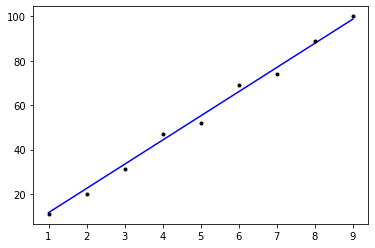

In [58]:
# 퀴즈 2.
# 예측
# 9.5시간 공부 -> 몇점?
# 7.2시간 공부 -> 몇점?

print(model.predict([9.5]))
print(model.predict([7.2]))

import matplotlib.pyplot as plt
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

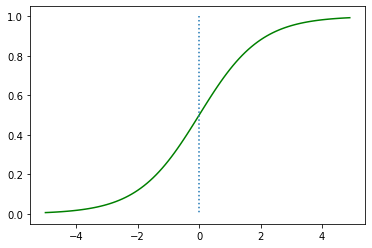

In [60]:
def mySigmoid(x) :
    return 1 / (1 + np.exp(-x))

x = np.arange(-5, 5, 0.1)
y = mySigmoid(x)
plt.plot(x, y, 'g')
plt.plot([0, 0], [1, 0], ":")

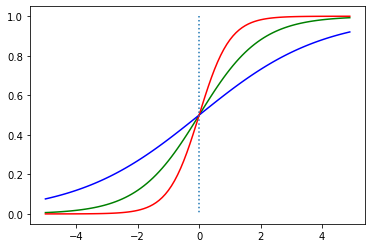

In [61]:
def mySigmoid2(x) :
    return 1 / (1 + np.exp(-x))

x = np.arange(-5, 5, 0.1)
y1 = mySigmoid(1 * x) # w*x
y2 = mySigmoid(0.5 * x) # w*x
y3 = mySigmoid(2 * x) # w*x
plt.plot(x, y1, 'g')
plt.plot(x, y2, 'b')
plt.plot(x, y3, 'r')
plt.plot([0, 0], [1, 0], ":")

In [ ]:
###이진 분류기###

In [62]:
x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 22, 31, 47, 55])
y = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) # 0 : 불, 1 : 합

In [ ]:
# x = 3, y = ? 0 or 1

In [63]:
model = Sequential()
model.add(Dense(1, input_dim = 1, activation = 'sigmoid'))

In [64]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(loss = 'binary_crossentropy', optimizer = sgd, metrics = ['binary_accuracy'])

In [66]:
model.fit(x, y, batch_size = 1, epochs = 5)

Epoch 1/5
13/13 [==============================] - 0s 1ms/step - loss: 0.0245 - binary_accuracy: 1.0000
Epoch 2/5
13/13 [==============================] - 0s 3ms/step - loss: 0.0245 - binary_accuracy: 1.0000
Epoch 3/5
13/13 [==============================] - 0s 4ms/step - loss: 0.0244 - binary_accuracy: 1.0000
Epoch 4/5
13/13 [==============================] - 0s 4ms/step - loss: 0.0244 - binary_accuracy: 1.0000
Epoch 5/5
13/13 [==============================] - 0s 7ms/step - loss: 0.0243 - binary_accuracy: 1.0000


array([[0.4994229 ],
       [0.89127266],
       [0.95917845]], dtype=float32)

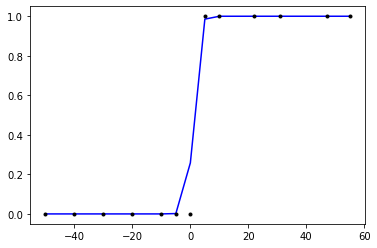

In [68]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')
model.predict([1, 3, 4])